<a href="https://colab.research.google.com/github/leandroleao2k/ImageML/blob/main/GMM%20Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GMM Gaussiana
GMM vai agrupar os padroes de acordo com a distribuição normal (Gauss) que ele encontrar nos dados. Com isso os clusters pondem até se sobrepor instancias, ou seja, elementos pondem ter uma probabilidade de estar em um cluster ou outro

Vamos usar Expectation Maximization EM para definir os melhores parametros 

In [18]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.patches import Ellipse

from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

%matplotlib inline
sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (20, 5)})

# cria base de dados
X , y = make_blobs ( n_samples=1000, centers=7, n_features=2, random_state=33)
df = pd.DataFrame(X, columns=['x','y'])
df['label'] = y
df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


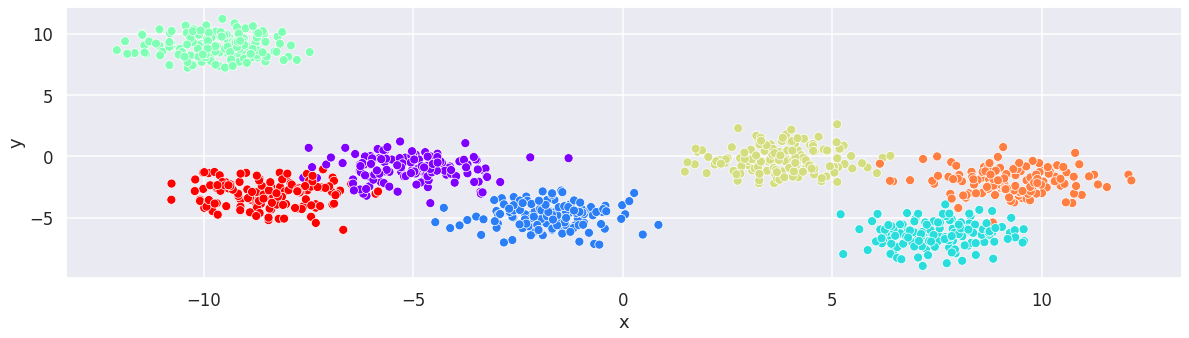

In [12]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

# Cria Funcao para treinar GMM e plotar:
https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [19]:
def treinar_plotar_DBSCAN(data, k=3, covariance_type='full', tol=0.001, max_iter=100, n_init=1, init_params='kmeans', random_state=133):
  data_cp = data.copy()
  data_cp.drop (columns='label',inplace = True)

  model = GaussianMixture(n_components=k,covariance_type=covariance_type, tol=tol, max_iter=max_iter, n_init=n_init, 
                          init_params=init_params, random_state=random_state)
  model.fit(data_cp)
  data_cp['cluster_labels'] = model.predict(data_cp)
  _ = sns.scatterplot(x='x', y='y', data=data_cp, hue='cluster_labels', palette='rainbow', legend=False)
  
  means = model.means_
  means_x = means[:,0]
  means_y = means[:,1]
  _ = plt.scatter(means_x, means_y, color='black', s=100)
  w_factor = 0.2 / model.weights_.max()

  if covariance_type == 'tied':
    covars = np.repeat(model.covariances_, k, axis=0)
  else:
    covars = model.covariances_
  return model

from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

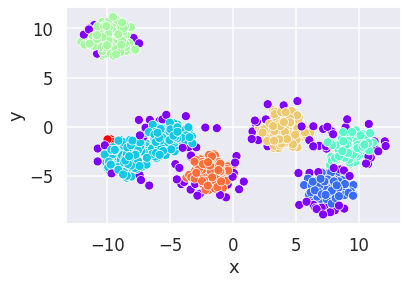

In [4]:
eps = 0.5
min = 5
labels = treinar_plotar_DBSCAN (df, eps, min)

# exemplo de baixa densidade

          x         y  label
0  0.449533 -0.403077      1
1  1.860595  0.011092      1
2  1.842407 -0.086292      1
3  1.395956 -0.438878      1
4  0.479125  0.926415      0


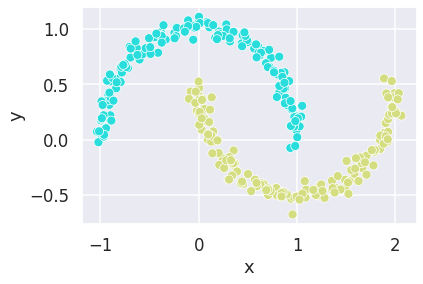

In [5]:
X, y = make_moons(300, noise= 0.05, random_state=33)

df_baixa_densidade = pd.DataFrame(X, columns=['x','y'])
df_baixa_densidade['label'] = y
print(df_baixa_densidade.head())
_ = sns. scatterplot(x='x',y='y', data=df_baixa_densidade, hue='label', palette = 'rainbow', legend =False )

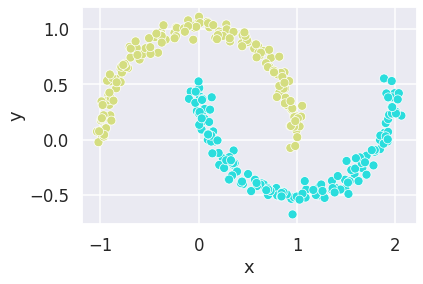

In [6]:
labels = treinar_plotar_DBSCAN(df_baixa_densidade, 0.3, 5)

## quando se aumenta os samples para 60 ele identifica outros grupos e outliers

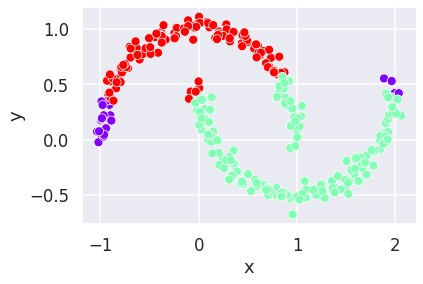

In [7]:
labels = treinar_plotar_DBSCAN(df_baixa_densidade, 0.6, 60)

# um estudo para melhor achar os parametros é usando o KNN
## chamado de "K-dist plot"

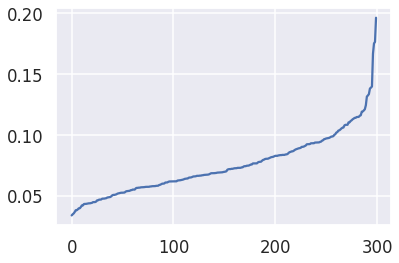

In [8]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors

n_vizinhos = 5
knn = NearestNeighbors(n_neighbors=n_vizinhos)
vizinhos = knn.fit(X)
# calcular as distancias dos vizinhos
distancias, indices= vizinhos.kneighbors(X)
# ordenamos o k-esimo vizinho mais proximo
distancias = np.sort(distancias, axis=0)
distancias = distancias[:, n_vizinhos-1]  # pega a ultima

plt.plot(distancias)

### voce vai notar na curva acima onde começa a mudança mais acentuada no x entre 250 e 300 o que daria um EPSLON de 0.100 a 0.125
### vamos testar abaixo min = 5 e epslon 0.11 os pontos azuis sao os outliers

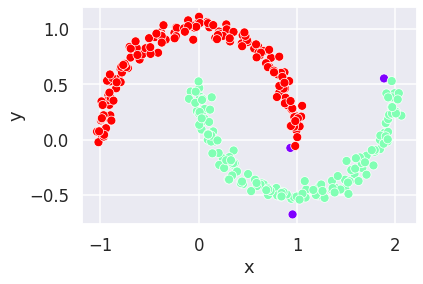

In [9]:
labels = treinar_plotar_DBSCAN(df_baixa_densidade, 0.12, 5)

# TO-DO fazer uma iteraçao para testar os varios casos de epslon do knn

0.09700493501066405
0.09712443940709585
0.09732396813625306
0.09753164059917299
0.0979705996971061
0.09854569124850096
0.09862614675817573
0.09889978963582646
0.09997655444423896
0.10054103358382009
0.10185805642798972
0.1022720464054391
0.10350288650821021
0.10374181485264174
0.1044234189603677
0.10526052925294906
0.10584633816514273
0.1060135697858749
0.10781161033565466
0.10824967593094084
0.10826521881185538
0.10826521881185538
0.11025597446674568
0.11027129229356859
0.11137038856843294
0.11194431482531818
0.11279877888164279
0.11332240578583988
0.11396144340902027
0.11402132933843914


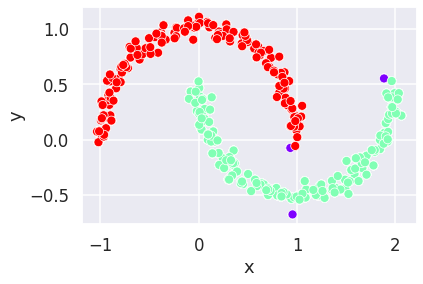

In [10]:
for d in distancias[250:-20]:
  print(d)
  labels = treinar_plotar_DBSCAN(df_baixa_densidade, d, 5)
  